1. Setting up 

In [69]:
# 1) import modules

import numpy as np
import pandas as pd # import library for data analysis

# Now import the function
from get_regression_coefs_general import get_regression_coefs

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns # for nicer plots (not essential)
sns.set_theme('talk', style = 'white')

2. Load & set up dataset

In [71]:
# 2.1) Load dataset
data0 = pd.read_excel('pwt100.xlsx', sheet_name = 'Data', header = 0)

In [72]:
# 2.2) Clean data

# Subset relevant columns and compute per capita real GDP
data = data0.loc[:, ("country", "year", "rgdpe", "pop")]
data["rgdpe_pc"] = data["rgdpe"] / data["pop"] 

# Select India 
data = data.loc[data["country"] == "India", ("year", "rgdpe_pc")]
# Reset the index (not crucial)
data = data.reset_index(drop = True)

# Subset the RGDP per capita series
ymax = 2019
ymin = 1950
# We use logical indexing to subset the data to rows of years ymin <= year <= ymax
Y = data.loc[np.logical_and(data["year"] <= ymax, data["year"] >= ymin), "rgdpe_pc"]
y = np.log(Y)
data = data[data["year"] >= ymin] # we keep only years after ymin

# Compute separate sample sizes for the subsample used for estimation and the whole sample.
T = len(Y) # sample size used for regression
T_all = data["year"].max() - (ymin - 1) # number of all years in the data after ymin

Part A: 

In [74]:
# 3.1) Additive Linear Model
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# The dependent variable is per capita GDP in *levels*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 # recall that Python starts indexing at 0

a_add_lin, b_add_lin = get_regression_coefs(Y, x1, x2)

In [75]:
# Initialise predicted values yhat
Yhat_add_lin = np.empty(T_all)

# Create loop to compute trend for all years
for t in range(T_all):
    Yhat_add_lin[t] = a_add_lin + b_add_lin * (t + 1) # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_lin = np.log(Yhat_add_lin)

Text(0.5, 1.0, 'Linear Additive: GDP & trend')

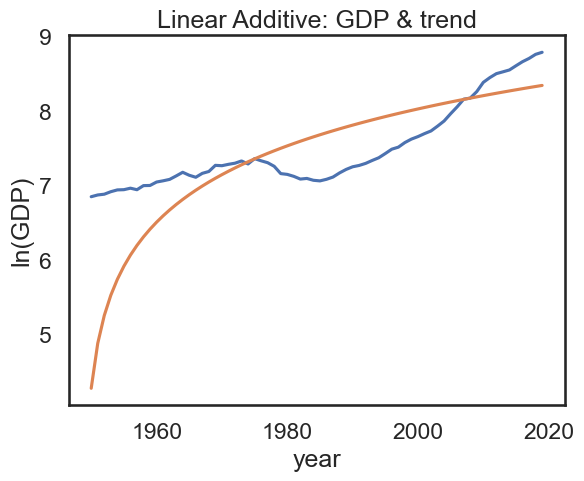

In [76]:
lw = 4

# since this program has only calculated one of the four trends, it can only plot one. But you have to think carefully 
# on how to present the results when you have calculated all four

plt.figure()
#one could add options such as a particular size and use instead
#plt.figure(figsize=(7, 5))
plt.plot(data['year'],np.log(data['rgdpe_pc']))
plt.plot(data['year'],yhat_add_lin)

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Linear Additive: GDP & trend")



In [95]:

data2 = data0.loc[data0['country'] == "India", ["country", "year", "rgdpna", "emp", "rnna", "hc"]]
alpha = 0.3

data2['TFP (a=0.3)'] = (data2['rgdpna'] / (data2['rnna']**(alpha) * data2['emp']**(1-alpha)))**(1/(1-alpha))

print(data2) 

     country  year        rgdpna         emp          rnna        hc  \
5460   India  1950  3.081142e+05  155.781677  7.080641e+05  1.130546   
5461   India  1951  3.139118e+05  157.742752  7.455952e+05  1.132679   
5462   India  1952  3.298569e+05  159.808167  7.678459e+05  1.134815   
5463   India  1953  3.489064e+05  161.970383  7.985495e+05  1.136956   
5464   India  1954  3.620167e+05  164.214508  8.500360e+05  1.139100   
...      ...   ...           ...         ...           ...       ...   
5525   India  2015  7.148966e+06  482.700470  2.791578e+07  2.077508   
5526   India  2016  7.739207e+06  482.989014  2.966240e+07  2.100536   
5527   India  2017  8.284343e+06  487.190979  3.153650e+07  2.123820   
5528   India  2018  8.791310e+06  491.077209  3.358000e+07  2.147362   
5529   India  2019  9.163052e+06  497.615723  3.542326e+07  2.171165   

       TFP (a=0.3)  
5460   1384.606902  
5461   1373.554168  
5462   1437.020362  
5463   1510.643871  
5464   1529.120968  
...      